In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import statsmodels.formula.api as sm


### Labéllisation

Dans cette partie, on va labéliser l'ensemble de nos variables. La labéllisation est détaillée dans le rapport avec détails. On va considérer que les réponses "don't know" correspondent à des "non" dans le sens où cette caractéristique ou ce service n'est pas pris en compte ou mis en valeur par le client, s'il marque dans son avis un "don't know". 

In [2]:
df = pd.read_csv("base_clean_2.csv")
df

C:\Users\antoi\OneDrive\Documents\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (53,60,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,Service_x,Length,Price,Agency,City,Incall,On_Time,Porn_Star,...,service_c,Service_z,service_d,States,Transgender,logprice,Price_Length,Legislation,Ethnicity_group,Photo Accurate
0,0,0,3,30,200,NaN,45,1.0,1,0.0,...,NaN,NaN,NaN,20,Yes,5.298317,6.666667,2,hispanic,3
1,1,2,3,60,300,NaN,81,1.0,1,0.0,...,NaN,NaN,NaN,19,Yes,5.703782,5.000000,5,asian,3
2,2,3,3,30,300,NaN,452,1.0,1,0.0,...,NaN,NaN,NaN,4,Yes,5.703782,10.000000,1,asian,3
3,3,4,9,45,300,1.0,851,1.0,0,0.0,...,NaN,NaN,NaN,4,Yes,5.703782,6.666667,1,white,2
4,4,5,0,30,130,0.0,869,1.0,1,0.0,...,NaN,NaN,NaN,7,Yes,4.867534,4.333333,3,hispanic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,21515,23086,3,30,100,0.0,144,0.5,1,0.0,...,NaN,NaN,NaN,40,No,4.605170,3.333333,2,white,3
21516,21516,23087,0,45,125,0.0,784,1.0,1,0.0,...,NaN,NaN,NaN,19,No,4.828314,2.777778,5,white,3
21517,21517,23088,5,60,200,0.0,167,0.5,1,0.0,...,NaN,NaN,NaN,35,No,5.298317,3.333333,1,white,3
21518,21518,23089,3,60,200,0.0,370,0.5,1,0.0,...,NaN,NaN,NaN,15,No,5.298317,3.333333,3,white,3


In [3]:


conditions = [
    (df['Transgender'] == "No"),
    (df['Transgender'] == "Yes"),

]

values = [0, 1]

df['Transgender'] = np.select(conditions, values)

Transformation de la variable age, et ajout de age carré

In [4]:
pd.to_numeric(df['Age'])

0        1
1        2
2        1
3        5
4        3
        ..
21515    1
21516    3
21517    1
21518    2
21519    4
Name: Age, Length: 21520, dtype: int64

In [5]:
df['Age2']=df['Age']*df['Age']

In [6]:
conditions = [
    (df['Eye_Color'] == 0),
    (df['Eye_Color'] == 1),
    (df['Eye_Color'] == 2),
    (df['Eye_Color'] == 3),
    (df['Eye_Color'] == 4),
    (df['Eye_Color'] == 5),
    (df['Eye_Color'] == 6),
   
]

values = [0, 1, 2, 3, 1,2, np.nan]

df['Eye_Color'] = np.select(conditions, values)

In [7]:
conditions = [
    (df['Hair_Length'] == 0),
    (df['Hair_Length'] == 1),
    (df['Hair_Length'] == 2),
    (df['Hair_Length'] == 3),
    (df['Hair_Length'] == 4),
    (df['Hair_Length'] == 5),
    (df['Hair_Length'] == 6),
        (df['Hair_Length'] == 7),
    (df['Hair_Length'] == 8),
   
]

values = [0, 2, 1, 1, 1,2,1, 0, 2]

df['Hair_Length'] = np.select(conditions, values)

In [8]:

conditions = [
    (df['Agency'] == 0),
    (df['Agency'] == 1),
    (df['Agency'] == 2),
    (df['Agency'] == 3),
]

values = [0, np.nan, 1, 2]

df['Agency'] = np.select(conditions, values)

In [9]:

conditions = [
    (df['Smokes'] == 0),
    (df['Smokes'] == 1),
    (df['Smokes'] == 2),
    (df['Smokes'] == 3),
]

values = [0, 1, 1, 1]

df['Smokes'] = np.select(conditions, values)

In [10]:

conditions = [
    (df['Availability'] == 0),
    (df['Availability'] == 1),
    (df['Availability'] == 2),
    (df['Availability'] == 3),
]

values = [0, np.nan, 1, 1]

df['Availability'] = np.select(conditions, values)

In [11]:

conditions = [
    (df['Ethnicity_group'] == "asian"),
    (df['Ethnicity_group'] == "black"),
    (df['Ethnicity_group'] == "brown"),
    (df['Ethnicity_group'] == "hispanic"),
    (df['Ethnicity_group'] == "native"),
    (df['Ethnicity_group'] == "white"),
    

]

values = [1, 2, 3, 4,5,0 ]

df['Ethnicity'] = np.select(conditions, values)

In [12]:
df.drop(columns=["Ethnicity_group"],inplace=True)

In [13]:
df

,Unnamed: 0,Unnamed: 0.1,Service_x,Length,Price,Agency,City,Incall,On_Time,Porn_Star,...,service_c,Service_z,service_d,States,Transgender,logprice,Price_Length,Legislation,Photo Accurate,Age2
0,0,0,3,30,200,0.0,45,1.0,1,0.0,...,NaN,NaN,NaN,20,1,5.298317,6.666667,2,3,1
1,1,2,3,60,300,0.0,81,1.0,1,0.0,...,NaN,NaN,NaN,19,1,5.703782,5.000000,5,3,4
2,2,3,3,30,300,0.0,452,1.0,1,0.0,...,NaN,NaN,NaN,4,1,5.703782,10.000000,1,3,1
3,3,4,9,45,300,NaN,851,1.0,0,0.0,...,NaN,NaN,NaN,4,1,5.703782,6.666667,1,2,25
4,4,5,0,30,130,0.0,869,1.0,1,0.0,...,NaN,NaN,NaN,7,1,4.867534,4.333333,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,21515,23086,3,30,100,0.0,144,0.5,1,0.0,...,NaN,NaN,NaN,40,0,4.605170,3.333333,2,3,1
21516,21516,23087,0,45,125,0.0,784,1.0,1,0.0,...,NaN,NaN,NaN,19,0,4.828314,2.777778,5,3,9
21517,21517,23088,5,60,200,0.0,167,0.5,1,0.0,...,NaN,NaN,NaN,35,0,5.298317,3.333333,1,3,1
21518,21518,23089,3,60,200,0.0,370,0.5,1,0.0,...,NaN,NaN,NaN,15,0,5.298317,3.333333,3,3,4


In [14]:

conditions = [
    (df['Build'] == 0),
    (df['Build'] == 1),
    (df['Build'] == 2),
    (df['Build'] == 3),
    (df['Build'] == 4),
    (df['Build'] == 5),
    (df['Build'] == 6),
    (df['Build'] == 7),

]

values = [0, 1, 2, 3,3,3,4,5]

df['Build'] = np.select(conditions, values)

In [15]:

conditions = [
    (df['Piercings'] == 0),
    (df['Piercings'] == 1),
    (df['Piercings'] == 2),
    (df['Piercings'] == 3),
    (df['Piercings'] == 4),
    (df['Piercings'] == 5),
    (df['Piercings'] == 6),
    (df['Piercings'] == 7),
    (df['Piercings'] == 8),
     (df['Piercings'] == 9),
     (df['Piercings'] == 10),

]

values = [0, 0, 0, 1,0,1,0,0,0,0,0]

df['Piercings'] = np.select(conditions, values)

In [16]:
conditions = [
    (df['Pussy'] == 0),
    (df['Pussy'] == 1),
    (df['Pussy'] == 2),
    (df['Pussy'] == 3),
]

values = [np.nan, 0, 1, 1]

df['Pussy'] = np.select(conditions, values)

In [17]:
conditions = [
    (df['Photo_Accurate'] == 0),
    (df['Photo_Accurate'] == 1),
    (df['Photo_Accurate'] == 2),
    (df['Photo_Accurate'] == 3),
    (df['Photo_Accurate'] == 4),
]

values = [0, 0, 0, 1,0]

df['Photo_Accurate'] = np.select(conditions, values)

In [18]:
conditions = [
    (df['Height'] == 0),
    (df['Height'] == 1),
    (df['Height'] == 2),
    (df['Height'] == 3),
    (df['Height'] == 4),
       (df['Height'] == 5),
    (df['Height'] == 6),
    (df['Height'] == 7),
    (df['Height'] == 8),
    (df['Height'] == 9),
       (df['Height'] == 10),
    (df['Height'] == 11),
    (df['Height'] == 12),
    (df['Height'] == 13),
    (df['Height'] == 14),
     (df['Height'] == 15),
]

values = [ 1, 2, 3,4,5,6,7,8,9,10,11,12, 13, 14, 0, 15]

df['Height'] = np.select(conditions, values)

In [19]:
pd.to_numeric(df['Height'])


0        4
1        4
2        4
3        3
4        4
        ..
21515    3
21516    3
21517    3
21518    4
21519    3
Name: Height, Length: 21520, dtype: int32

In [20]:

conditions = [
    (df['Service_x'] == 0),
    (df['Service_x'] == 1),
    (df['Service_x'] == 2),
    (df['Service_x'] == 3),
    (df['Service_x'] == 4),
    (df['Service_x'] == 5),
    (df['Service_x'] == 6),
    (df['Service_x'] == 7),
    (df['Service_x'] == 8),
     (df['Service_x'] == 9),
    (df['Service_x'] == 10),
    (df['Service_x'] == 11),
    (df['Service_x'] == 12),
    (df['Service_x'] == 13),
    (df['Service_x'] == 14),
    (df['Service_x'] == 15),
    (df['Service_x'] == 16),
    (df['Service_x'] == 17),
    (df['Service_x'] == 18),
]

values = [0, 0, 0, 0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2]

df['Service_x'] = np.select(conditions, values)

In [21]:

conditions = [
    (df['Breast_Appearance'] == 0),
    (df['Breast_Appearance'] == 1),
    (df['Breast_Appearance'] == 2),
    (df['Breast_Appearance'] == 3),
    (df['Breast_Appearance'] == 4),
    (df['Breast_Appearance'] == 5),
    (df['Breast_Appearance']== 6),
    (df['Breast_Appearance'] == 7),
    (df['Breast_Appearance'] == 8),
     (df['Breast_Appearance'] == 9),
]

values = [0, 0, 0, 1,0,0,1,0,0,1]

df['Breast_Appearance'] = np.select(conditions, values)

In [22]:

conditions = [
    (df['Breast_Cup'] == 0),
    (df['Breast_Cup'] == 1),
    (df['Breast_Cup'] == 2),
    (df['Breast_Cup'] == 3),
    (df['Breast_Cup'] == 4),
    (df['Breast_Cup'] == 5),
    (df['Breast_Cup'] == 6),
    (df['Breast_Cup'] == 7),

]

values = [1, 2, 3, 4,5,6,0,7]

df['Breast_Cup'] = np.select(conditions, values)
pd.to_numeric(df['Breast_Cup'])
     

0        3
1        3
2        3
3        0
4        4
        ..
21515    3
21516    2
21517    2
21518    3
21519    2
Name: Breast_Cup, Length: 21520, dtype: int32

In [23]:

conditions = [
    (df['Tattoos'] == 0),
    (df['Tattoos'] == 1),
    (df['Tattoos'] == 2),
    (df['Tattoos'] == 3),
    (df['Tattoos'] == 4),
]

values = [1, 0, 1, 0,1]

df['Tattoos'] = np.select(conditions, values)

In [24]:
pd.to_numeric(df['Breast_Size'])

0        2
1        2
2        2
3        9
4        3
        ..
21515    2
21516    2
21517    2
21518    1
21519    3
Name: Breast_Size, Length: 21520, dtype: int64

In [25]:

conditions = [
    (df['Breast_Implants'] == 0),
    (df['Breast_Implants'] == 1),
    (df['Breast_Implants'] == 2),

]

values = [0, 0, 1]

df['Breast_Implants'] = np.select(conditions, values)

In [26]:

conditions = [
    (df['Massage'] == 0),
    (df['Massage'] == 1),
    (df['Massage'] == 2),
    (df['Massage'] == 3),
    (df['Massage'] == 4),
    (df['Massage'] == 5),
    (df['Massage']== 6),
    (df['Massage'] == 7),

]

values = [0, 0, 1, 2,3,4,5,6]

df['Massage'] = np.select(conditions, values)

In [27]:

conditions = [
    (df['Sex'] == 0),
    (df['Sex'] == 1),
    (df['Sex'] == 2),]


values = [0, 0, 1]

df['Sex'] = np.select(conditions, values)

In [28]:

conditions = [
    (df['Blow_Job'] == 0),
    (df['Blow_Job'] == 1),
    (df['Blow_Job'] == 2),
(df['Blow_Job'] == 3),]


values = [0, 0, 1,1]

df['Blow_Job'] = np.select(conditions, values)

In [29]:

conditions = [
    (df['Cum_In_Mouth'] == 0),
    (df['Cum_In_Mouth'] == 1),
    (df['Cum_In_Mouth'] == 2),
(df['Cum_In_Mouth'] == 3),
(df['Cum_In_Mouth'] == 4),]


values = [0, 0, 0,1, 1]

df['Cum_In_Mouth'] = np.select(conditions, values)

In [30]:

conditions = [
    (df['Touch_Pussy'] == 0),
    (df['Touch_Pussy'] == 1),
    (df['Touch_Pussy'] == 2),
(df['Touch_Pussy'] == 3),]

values = [0, 0, 1,1]

df['Touch_Pussy'] = np.select(conditions, values)

In [31]:

conditions = [
    (df['Kiss'] == 0),
    (df['Kiss'] == 1),
    (df['Kiss'] == 2),
(df['Kiss'] == 3),]

values = [0, 0, 1,1]

df['Kiss'] = np.select(conditions, values)

In [32]:
conditions = [
    (df['More_Than_One_Guy_At_A_Time'] == 0),
    (df['More_Than_One_Guy_At_A_Time']==1),
    (df['More_Than_One_Guy_At_A_Time'] == 2),
    (df['More_Than_One_Guy_At_A_Time'] == 3),

    


]

values = [0, 0, 1,1]

df['More_Than_One_Guy_At_A_Time'] = np.select(conditions, values)

In [33]:
conditions = [
    (df['Two_Girl_Action'] == 0),
    (df['Two_Girl_Action']==1),
    (df['Two_Girl_Action'] == 2),
    (df['Two_Girl_Action'] == 3),

    


]

values = [0, 0, 1,1]

df['Two_Girl_Action'] = np.select(conditions, values)

In [34]:
conditions = [
    (df['Multiple_Pops_Allowed'] == 0),
    (df['Multiple_Pops_Allowed']==1),
    (df['Multiple_Pops_Allowed'] == 2),
    (df['Multiple_Pops_Allowed'] == 3),

    


]

values = [0, 0, 1,1]

df['Multiple_Pops_Allowed'] = np.select(conditions, values)


In [35]:

conditions = [
    (df['Squirt'] == 0),
    (df['Squirt']==1),
    (df['Squirt'] == 2),
    

    


]

values = [0, 0, 1]

df['Squirt'] = np.select(conditions, values)

In [36]:

conditions = [
    (df['Female_Condom'] == 0),
    (df['Female_Condom']==1),
    (df['Female_Condom'] == 2),
    

    


]

values = [0, 0, 1]

df['Female_Condom'] = np.select(conditions, values)

In [37]:

conditions = [
    (df['Massage_Quality'] == 0),
    (df['Massage_Quality']==1),
    (df['Massage_Quality'] == 2),
      (df['Massage_Quality']==3),
    (df['Massage_Quality'] == 4),
    

    


]

values = [0, 1, 0,1, 1]

df['Massage_Quality'] = np.select(conditions, values)

In [38]:

conditions = [
    (df['S_M'] == 0),
    (df['S_M']==1),
    (df['S_M'] == 2),
      (df['S_M']==3),
    (df['S_M'] == 4),
]

values = [0, 1, 1,0, 1]

df['S_M'] = np.select(conditions, values)

In [39]:

conditions = [
    (df['Lick_Pussy'] == 0),
    (df['Lick_Pussy']==1),
    (df['Lick_Pussy'] == 2),
   
    
]

values = [0, 0, 1]

df['Lick_Pussy'] = np.select(conditions, values)

In [40]:

conditions = [
    (df['Anal'] == 0),
    (df['Anal']==1),
    (df['Anal'] == 2),(df['Anal'] == 3),
   
    
]

values = [0, 0, 1, 1]

df['Anal'] = np.select(conditions, values)

In [41]:

conditions = [
    (df['Will_Bring_Second_Provider'] == 0),
    (df['Will_Bring_Second_Provider']==1),
    (df['Will_Bring_Second_Provider'] == 2),(df['Will_Bring_Second_Provider'] == 3),
   
    
]

values = [0, 0, 1, 1]

df['Will_Bring_Second_Provider'] = np.select(conditions, values)

In [42]:

conditions = [
    (df['Full_No_Rush_Session'] == 0),
    (df['Full_No_Rush_Session']==1),
    (df['Full_No_Rush_Session'] == 2),(df['Full_No_Rush_Session'] == 3),
   
    
]

values = [0, 0, 1, 1]

df['Full_No_Rush_Session'] = np.select(conditions, values)


In [43]:

conditions = [
    (df['Rimming'] == 0),
    (df['Rimming']==1),
    (df['Rimming'] == 2),
    (df['Rimming'] == 3),
      (df['Rimming'] == 4),
    (df['Rimming']==5),
    (df['Rimming'] == 6),
    (df['Rimming'] == 7),
    (df['Rimming'] == 8),
    (df['Rimming'] == 9),
    
]

values = [0, 0, 1, 1, 0, 1, 1,0,1, 1]

df['Rimming'] = np.select(conditions, values)


In [44]:


conditions = [
    (df['Allow_Film_Or_Picture'] == 0),
    (df['Allow_Film_Or_Picture']==1),
    (df['Allow_Film_Or_Picture'] == 2),
   
    
]

values = [0, 0, 1]

df['Allow_Film_Or_Picture'] = np.select(conditions, values)



In [45]:
conditions = [
    (df['Transsexual_Functionality'] == 0),
    (df['Transsexual_Functionality']==1),
    (df['Transsexual_Functionality'] == 2),
     (df['Transsexual_Functionality']==3),
    (df['Transsexual_Functionality'] == 4),
   
    
]

values = [np.nan, 0, 2, 1, np.nan ]

df['Transsexual_Functionality'] = np.select(conditions, values)


In [46]:
conditions = [
    (df['Transsexual_Cock_Size'] == 0),
    (df['Transsexual_Cock_Size']==1),
    (df['Transsexual_Cock_Size'] == 2),
     (df['Transsexual_Cock_Size']==3),
    (df['Transsexual_Cock_Size'] == 4),
     (df['Transsexual_Cock_Size']==5),
    (df['Transsexual_Cock_Size'] == 6),
   
    
]

values = [4, 0, 1, 2, 3, np.nan,np.nan ]

df['Transsexual_Cock_Size'] = np.select(conditions, values)



In [47]:
conditions = [
    (df['Transsexual_Versatility'] == 0),
    (df['Transsexual_Versatility']==1),
    (df['Transsexual_Versatility'] == 2),
     (df['Transsexual_Versatility']==3),
    (df['Transsexual_Versatility'] == 4),

   
    
]

values = [0, np.nan, 1, 2, np.nan ]

df['Transsexual_Versatility'] = np.select(conditions, values)

In [48]:
conditions = [
    (df['Transsexual_Circumcised'] == 0),
    (df['Transsexual_Circumcised']==1),
    (df['Transsexual_Circumcised'] == 2),
     (df['Transsexual_Circumcised']==3),
   

   
    
]

values = [np.nan, 0, 1,np.nan ]

df['Transsexual_Circumcised'] = np.select(conditions, values)


In [49]:
conditions = [
    (df['Transsexual_Ejaculates'] == 0),
    (df['Transsexual_Ejaculates']==1),
    (df['Transsexual_Ejaculates'] == 2),
     (df['Transsexual_Ejaculates']==3),
   

   
    
]

values = [np.nan, 0, 1,np.nan ]

df['Transsexual_Ejaculates'] = np.select(conditions, values)


In [50]:
df.drop(columns=["Incall", "Photo Accurate","service_b","service_c", "Agency","Service_z", "Availability", "City", "On_Time","Transsexual", "Porn_Star","service_d", "Other_City_Serviced","service_a", "Service_y", "Phone_Type"],inplace=True)

In [51]:
df

,Unnamed: 0,Unnamed: 0.1,Service_x,Length,Price,Languages,Smokes,Services_Delivered_As_Promised,Build,Ethnicity,...,Transsexual_Cock_Size,Transsexual_Circumcised,Transsexual_Ejaculates,Phone 2,States,Transgender,logprice,Price_Length,Legislation,Age2
0,0,0,0,30,200,22,0,1,2,4,...,NaN,NaN,NaN,NaN,20,1,5.298317,6.666667,2,1
1,1,2,0,60,300,2,0,1,2,1,...,NaN,NaN,NaN,NaN,19,1,5.703782,5.000000,5,4
2,2,3,0,30,300,2,0,1,4,1,...,NaN,NaN,NaN,NaN,4,1,5.703782,10.000000,1,1
3,3,4,1,45,300,2,1,0,5,0,...,NaN,NaN,NaN,NaN,4,1,5.703782,6.666667,1,25
4,4,5,0,30,130,22,0,1,4,4,...,NaN,NaN,NaN,NaN,7,1,4.867534,4.333333,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,21515,23086,0,30,100,44,1,1,0,0,...,NaN,NaN,NaN,NaN,40,0,4.605170,3.333333,2,1
21516,21516,23087,0,45,125,44,1,1,1,0,...,NaN,NaN,NaN,NaN,19,0,4.828314,2.777778,5,9
21517,21517,23088,0,60,200,44,0,1,0,0,...,NaN,NaN,NaN,NaN,35,0,5.298317,3.333333,1,1
21518,21518,23089,0,60,200,44,1,1,4,0,...,NaN,NaN,NaN,NaN,15,0,5.298317,3.333333,3,4


### Régressions

On fait une première régression en ne prenant en compte que les services, la durée de la prestation ainsi que notre variable d'intérêt. Cette première estimation ne permet pas de calculer un effet causal mais permet de voir le signe du coefficient (on remarque que l'intervalle de confiance par la variable transgenre est très important). 

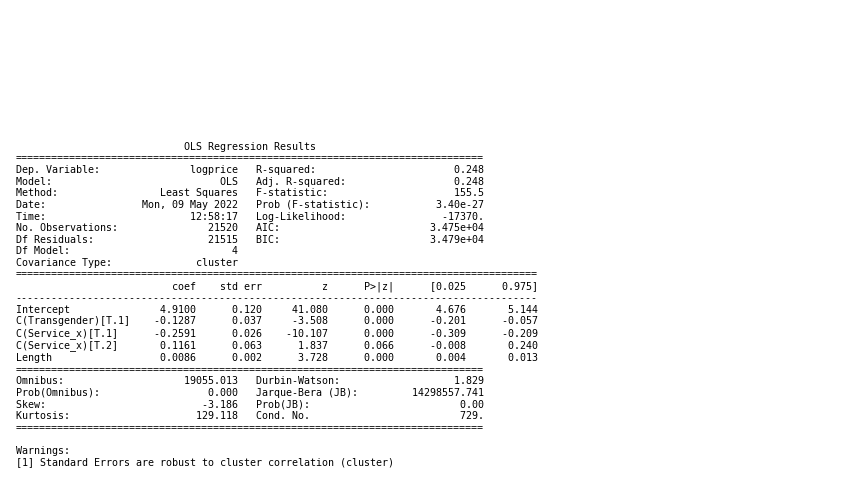

In [122]:
result_1 = sm.ols(formula= " logprice ~  C(Transgender)+ C(Service_x)+Length", data=df).fit(cov_type='cluster',cov_kwds={'groups': df['States']})
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_1.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

In [127]:
err_series = result_1.params - result_1.conf_int()[0]
coef_df = pd.DataFrame({'coef': result_1.params.values[1:4],
                        'err': err_series.values[1:4],
                        'varname': np.array(['Trangenre','Massage', 'S&M'])})


<ipython-input-128-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


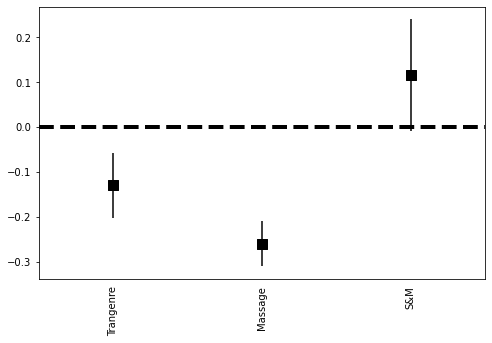

In [128]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

### Statistiques descriptives

On regarde les corrélations entre nos variables sur trois catégories de variables : générales, physiques et services proposées. On regarde donc les variables fortement corrélées avec le log du prix, ainsi qu'avec la variable transgenre. On regardera par la suite si ces variables sont sélectionnées dans les deux LASSO de premières étapes de notre estimation. On commence par regarder les caractéristiques générales.

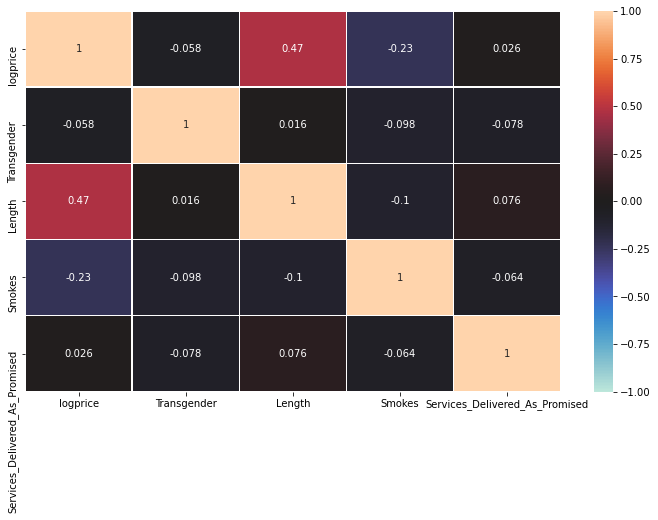

In [55]:
df_1=df[['logprice',  'Transgender','Length','Smokes','Services_Delivered_As_Promised' ]]
corr = df_1.corr(method='pearson')

sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io',
        fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='red', alpha=0.5)

fig.tight_layout()

Les variables fortement corrélées avec le prix sont la durée de la prestation et le fait de fumer. Aucune variable n'apparaît particulièrement corrélée avec l'identité de genre de la TDS

On regarde désormais les variables de caractéristiques physiques

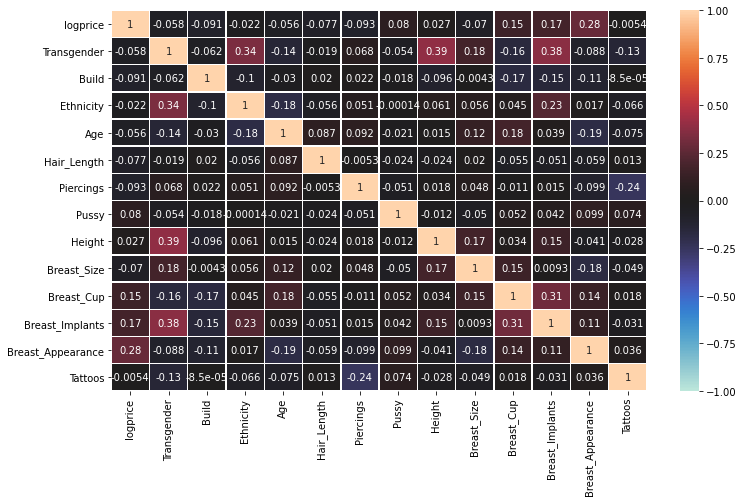

In [56]:
df_1=df[['logprice',  'Transgender','Build','Ethnicity','Age','Hair_Length','Piercings','Pussy','Height','Breast_Size','Breast_Cup','Breast_Implants','Breast_Appearance','Tattoos' ]]
corr = df_1.corr(method='pearson')

sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io',
        fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='red', alpha=0.5)

fig.tight_layout()

Il est important d'inclure la variable de taille, le tour de poitrine, les implants mamaires, l'âge. Concernant le prix, les variables fortement corrélées avec notre variable d'intérêt sont : le bonnet, le tour de poitrine et l'apparance de la poitrine.

On regarde désormais les variables de services

In [57]:
df_1=df[[ 'logprice',  'Transgender', 'Massage','Sex','Blow_Job','Cum_In_Mouth','Touch_Pussy','Kiss','Two_Girl_Action','More_Than_One_Guy_At_A_Time','Multiple_Pops_Allowed','Squirt','Female_Condom','Massage_Quality','S_M','Lick_Pussy','Anal','Will_Bring_Second_Provider','Full_No_Rush_Session','Rimming','Allow_Film_Or_Picture']]


corr = df_1.corr(method='spearman')

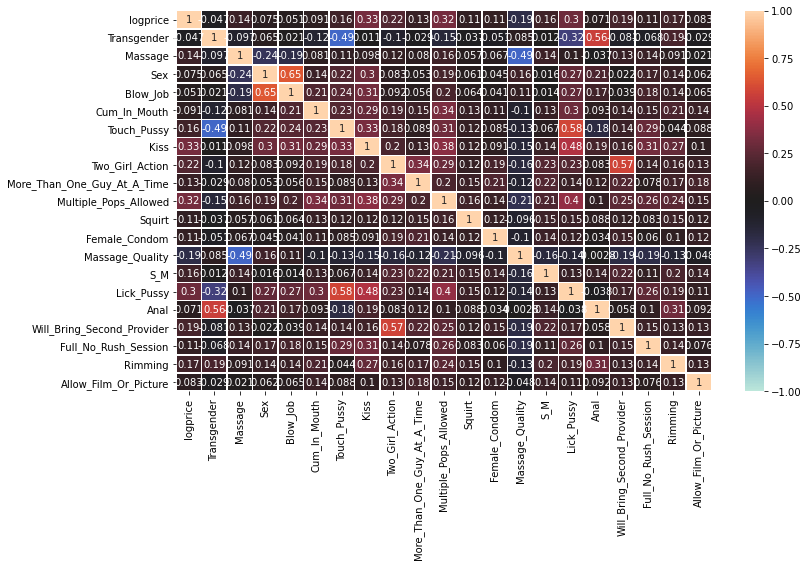

In [58]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io',
        fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='red', alpha=0.5)

fig.tight_layout()

La variable trangenre est fortement corrélée à : "touch_pussy", "squirt", "female condom", "lick pussy", "anal", "rimming". La variable de prix est quant à elle fortement corrélée à un ensemble de services offerts : "blow job", "cum in mouth", "touch pussy", "kiss", "two girl action" ,'More_Than_One_Guy_At_A_Time','Multiple_Pops_Allowed','Squirt','Female_Condom','Massage_Quality','S_M', "Lick Pussy", "will bring a second provider" et "rimming"

Afin de sélectionner nos variables de manières plus pertinentes, on pourrait faire un double lasso procedure

On effectue notre régression en deux parties: 
1. On estime  $Wage_{length} = \alpha_1 + \beta_1 X + \epsilon$ avec un Lasso en excluant la dummy transgenre
2. On estime $Transgenre = \alpha_2 + \beta_2 X + \epsilon$ avec un Lasso 
3. On note $\hat{X}$ l'union des variables explicatives avec un coefficients différent de 0 dans $\beta_1$ et $\beta_2$. On estime un post_Lasso modèle 
$log(Price) = \alpha_3 + \beta_3 \hat{X} + \epsilon$ avec un OLS

#### Premier Lasso sur la variable cible

On sélectionne un sous data frame avec les variables qui nous intéréssent (ou exlue les variables avec des na trop nombreux, ou les variables sont intérêts).

In [59]:
 df.drop(columns=["Unnamed: 0.1","Transsexual_Functionality", "Pussy","Unnamed: 0", "Eye_Color","Transsexual_Versatility","Transsexual_Cock_Size","Transsexual_Circumcised","Transsexual_Ejaculates", "Age2", "Price"],inplace=True)

In [63]:
df = df.drop(df.columns[[38]], axis=1)

In [66]:
import sklearn
XTrain = df.iloc[:,:37]
import statsmodels.api as sm
X1Train = sm.add_constant(XTrain)
YTrain = df.iloc[:,41]

In [67]:
X1Train = pd.get_dummies(X1Train, columns=[ "Service_x", "Languages","Build","Ethnicity", "Hair_Color", "Hair_Type","Hair_Length", "Massage", "Age", "Height", "Breast_Size", "Breast_Cup"])


In [68]:
X1Train=X1Train.drop(columns=['Length'])

On enlève les références des dummys

In [69]:
X1Train = X1Train.drop(columns=['Service_x_0',  "Languages_1","Build_0","Ethnicity_0", "Hair_Color_0", "Hair_Type_0","Hair_Length_0", "Massage_0", "Age_0", "Height_1", "Breast_Size_0", "Breast_Cup_0"])

On regresse notre modèle sur différentes valeurs de $\alpha$, que l'on sélectionnera ensuite par validation croisée.

In [71]:
my_alphas = np.array([0.001,0.01,0.02,0.025, 0.03,0.035,0.04,0.045,0.05,0.1,0.25,0.5,0.8,1.0])
#valeurs de alpha à tester

In [72]:
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(X1Train,YTrain,alphas=my_alphas, max_iter=10000)

In [73]:
print(coefs_lasso.shape)

(129, 14)


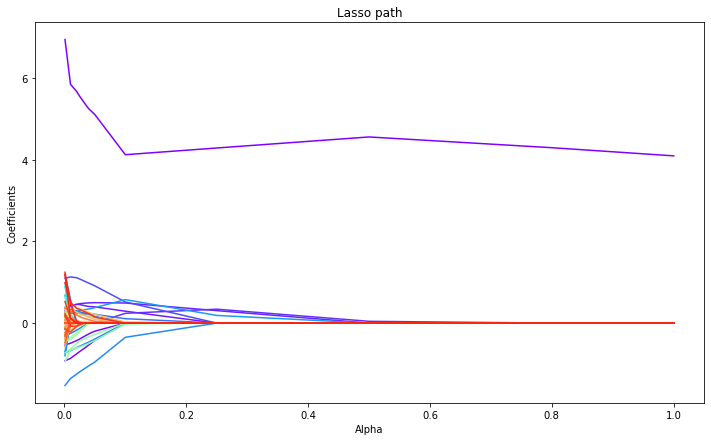

In [74]:
import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,135))
#graphique lasso path (une courbe par variable)
for i in range(coefs_lasso.shape[0]):
 plt.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()


In [75]:

nbNonZero= np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso,axis=0)

On regarde le nombre de coefficients qui tendent vers 0 suivant la valeur de $\alpha$

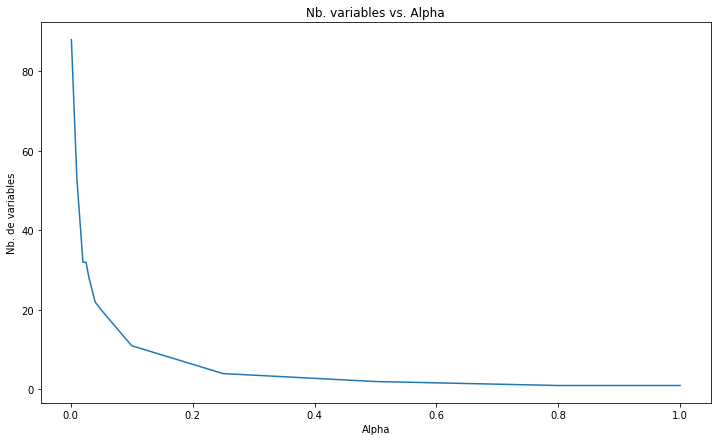

In [76]:
plt.plot(alpha_for_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. de variables')
plt.title('Nb. variables vs. Alpha')
plt.show()

On fait une vallidation croisée afin de choisir le alpha optimal

In [77]:
import sklearn

In [79]:
lcv =  sklearn.linear_model.LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5, max_iter=10000000
                                   )

#lancement sur l'échantillon d'apprentissage
lcv.fit(X1Train,YTrain) 

LassoCV(alphas=array([0.001, 0.01 , 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.1  , 0.25 , 0.5  , 0.8  , 1.   ]),
        cv=5, fit_intercept=False, max_iter=10000000, random_state=0)

In [80]:
avg_mse = np.mean(lcv.mse_path_,axis=1)


In [81]:
print(pd.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse}))

    alpha        MSE
0   1.000  28.619951
1   0.800  28.259951
2   0.500  27.881646
3   0.250  27.538407
4   0.100  27.120100
5   0.050  26.655532
6   0.045  26.640289
7   0.040  26.630518
8   0.035  26.625668
9   0.030  26.622102
10  0.025  26.621516
11  0.020  26.628096
12  0.010  26.639662
13  0.001  26.657149


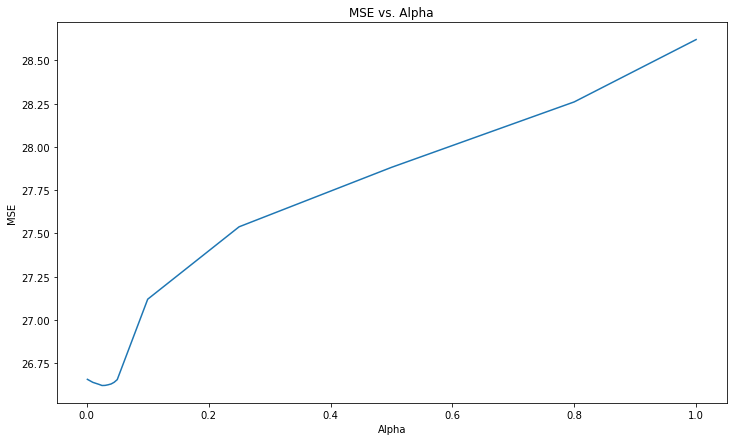

In [82]:
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()


On Choisit donc comme alpha 0,035 on construit donc le modèle avec ce alpha

In [83]:
lcv.alpha_=np.array([lcv.alpha_])

In [84]:


alpha_for_path, coefs_lasso, _ = lasso_path(X1Train,YTrain,alphas=lcv.alpha_)

In [85]:
nom_var = X1Train.columns[:]

coefs25 = coefs_lasso
a=pd.DataFrame(coefs25)
a.rename(columns={0: 'Valeurs'}, inplace=True) 
                           
b=pd.DataFrame({'Variables':nom_var})

In [86]:
det = pd.concat([a,b], join = 'outer', axis = 1)
det = det[det["Valeurs"] != 0]

On regarde l'ensuite des variables sélectionnées dans cette première étape

In [87]:
det

,Valeurs,Variables
0,5.557412,const
1,-0.391234,Smokes
2,-0.698239,Services_Delivered_As_Promised
5,0.453595,Breast_Implants
6,0.474676,Breast_Appearance
7,0.026914,Tattoos
13,1.080807,Two_Girl_Action
15,0.241597,Multiple_Pops_Allowed
20,0.249357,Lick_Pussy
21,-0.130968,Anal


In [88]:
det['Variables'].unique()

array(['const', 'Smokes', 'Services_Delivered_As_Promised',
       'Breast_Implants', 'Breast_Appearance', 'Tattoos',
       'Two_Girl_Action', 'Multiple_Pops_Allowed', 'Lick_Pussy', 'Anal',
       'Will_Bring_Second_Provider', 'Full_No_Rush_Session',
       'Service_x_1', 'Languages_2', 'Languages_44', 'Build_1', 'Build_3',
       'Build_4', 'Ethnicity_1', 'Ethnicity_2', 'Hair_Color_2',
       'Hair_Length_1', 'Massage_3', 'Age_1', 'Age_2', 'Height_3',
       'Height_4', 'Breast_Size_1', 'Breast_Size_2', 'Breast_Cup_1',
       'Breast_Cup_3', 'Breast_Cup_5'], dtype=object)

#### Lasso sur la variable transgenre

In [89]:
YTrain = df.iloc[:,39]

In [90]:
my_alphas = np.array([0.001,0.01,0.02,0.025, 0.03,0.035,0.04,0.045,0.05,0.1,0.25,0.5,0.8,1.0])
#valeurs de alpha à tester

In [91]:
alpha_for_path, coefs_lasso, _ = lasso_path(X1Train,YTrain,alphas=my_alphas, max_iter=10000)

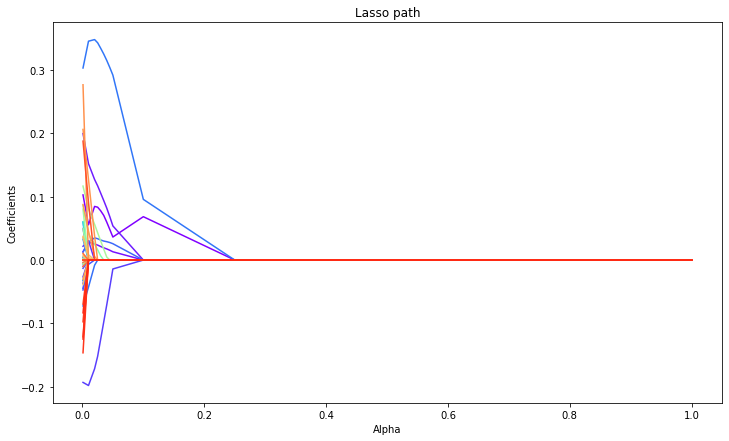

In [92]:
import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,136))
#graphique lasso path (une courbe par variable)
for i in range(coefs_lasso.shape[0]):
 plt.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()


In [93]:

nbNonZero= np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso,axis=0)

On regarde le nombre de coefficients qui tendent vers 0 suivant la valeur de $\alpha$

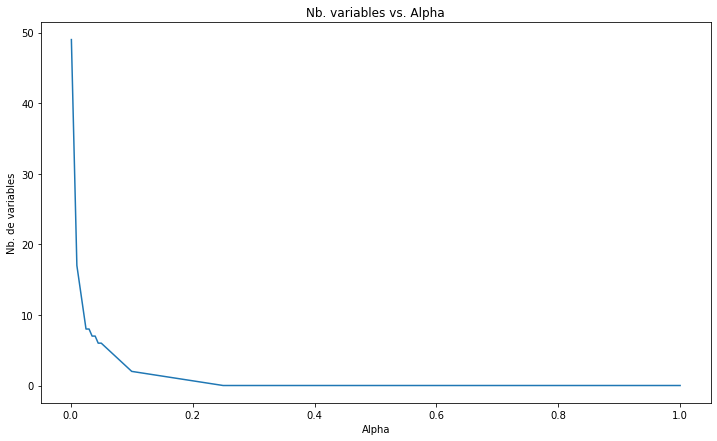

In [94]:
plt.plot(alpha_for_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. de variables')
plt.title('Nb. variables vs. Alpha')
plt.show()

In [95]:

lcv =  sklearn.linear_model.LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=7, max_iter=1000000000,tol=0.001
                                   )

#lancement sur l'échantillon d'apprentissage
lcv.fit(X1Train,YTrain) 

LassoCV(alphas=array([0.001, 0.01 , 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.1  , 0.25 , 0.5  , 0.8  , 1.   ]),
        cv=7, fit_intercept=False, max_iter=1000000000, random_state=0,
        tol=0.001)

In [96]:
avg_mse = np.mean(lcv.mse_path_,axis=1)

In [97]:
print(pd.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse}))

    alpha       MSE
0   1.000  0.190894
1   0.800  0.190894
2   0.500  0.190894
3   0.250  0.190894
4   0.100  0.192120
5   0.050  0.188713
6   0.045  0.186960
7   0.040  0.184504
8   0.035  0.182331
9   0.030  0.178791
10  0.025  0.171888
11  0.020  0.162316
12  0.010  0.135156
13  0.001  0.096686


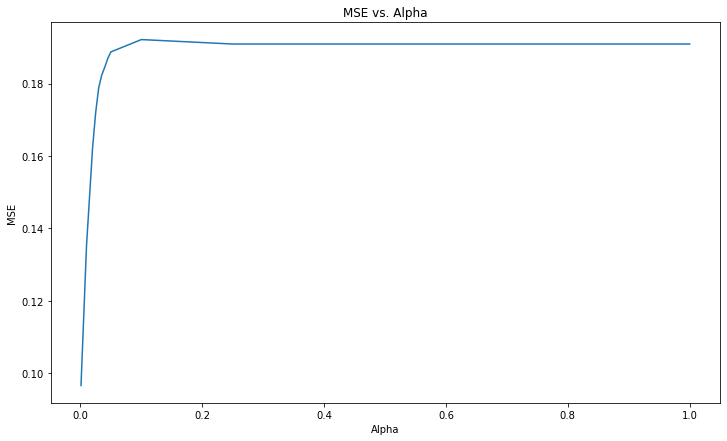

In [98]:
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

Afin d'avoir un modèle plus parcimonieux, on applique la règle de la one standard deviation, que l'on applique.

In [99]:
alpha_1 =avg_mse.std()+lcv.alpha_
alpha_1 = np.array([alpha_1])

In [100]:
alpha_for_path, coefs_lasso, _ = lasso_path(X1Train,YTrain,alphas=alpha_1, max_iter=10000)


In [101]:
nom_var = X1Train.columns[:]

coefs25 = coefs_lasso
a=pd.DataFrame(coefs25)
a.rename(columns={0: 'Valeurs'}, inplace=True) 
                           
b=pd.DataFrame({'Variables':nom_var})

In [102]:
det = pd.concat([a,b], join = 'outer', axis = 1)
det = det[det["Valeurs"] != 0]

Voici l'ensemble des variables sélectionnées dans la seconde étape : 

In [103]:
det

,Valeurs,Variables
0,0.081139,const
3,0.022508,Piercings
5,0.111790,Breast_Implants
11,-0.139540,Touch_Pussy
18,0.032437,Massage_Quality
21,0.338654,Anal
70,0.011676,Languages_44
79,0.037051,Ethnicity_4


#### Double Lasso : régression multivariée

On utilise ici comme variables explicatives l'union des variables des deux modèles de Lasso.

C:\Users\antoi\OneDrive\Documents\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 54, but rank is 49
  warnings.warn('covariance of constraints does not have full '
<ipython-input-131-cd7aa271e680>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


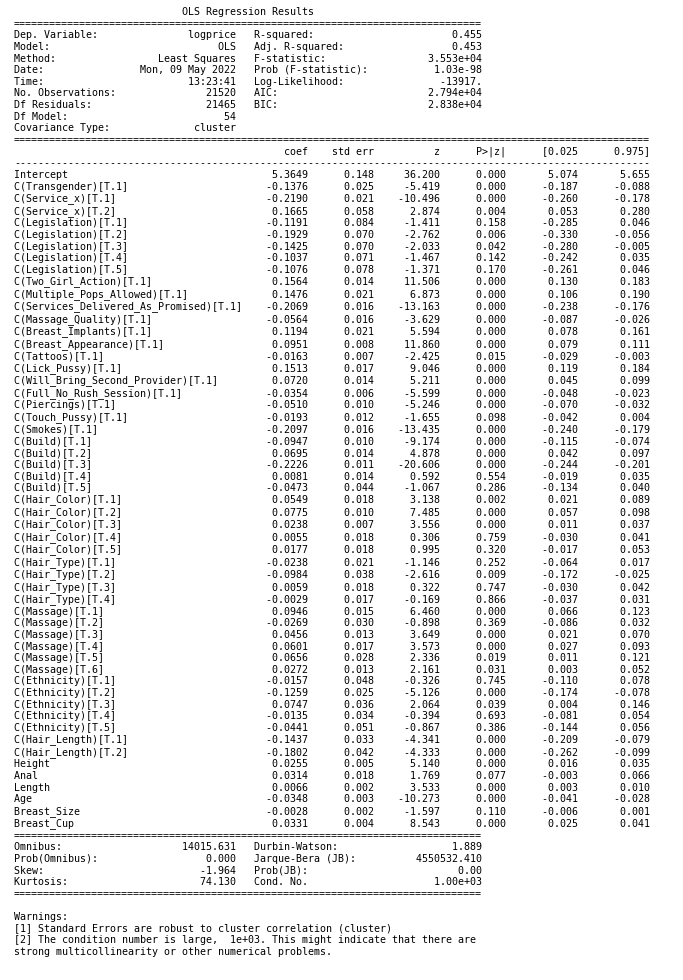

In [131]:
import statsmodels.formula.api as sm
result_2 = sm.ols(formula= " logprice ~ C(Transgender) + Anal+ Length+ Age+ C(Service_x)+C(Legislation)+C(Two_Girl_Action)+ C(Multiple_Pops_Allowed)+ C(Services_Delivered_As_Promised) +C(Massage_Quality)+C(Breast_Implants)+ C(Breast_Appearance)+C(Tattoos)+ C(Lick_Pussy)+C(Will_Bring_Second_Provider)+C(Full_No_Rush_Session)+Age+Breast_Size +Breast_Cup+ C(Piercings)+C(Touch_Pussy)+C(Smokes)+C(Build)+C(Hair_Color)+C(Hair_Type)+C(Massage)+C(Ethnicity)+C(Hair_Length) ", data=df).fit(cov_type='cluster',cov_kwds={'groups': df['States']})
                                                    
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_2.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_2.png')

In [132]:
err_series = result_2.params - result_2.conf_int()[0]
coef_df = pd.DataFrame({'coef': result_2.params.values[1:4],
                        'err': err_series.values[1:4],
                        'varname': np.array(['Trangenre','Massage','S&M'])
                       })


<ipython-input-133-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


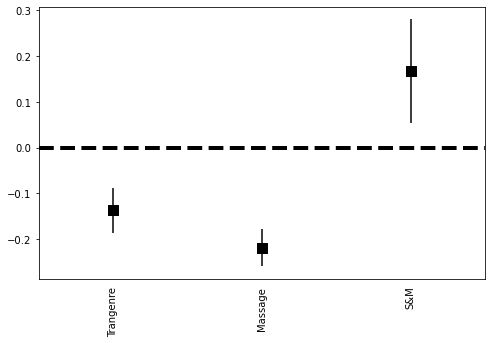

In [133]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

In [134]:
pip install stargazer

In [135]:
from stargazer.stargazer import Stargazer, LineLocation

In [136]:
stargazer = Stargazer([result_2])

In [137]:
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{1}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{1-2}\n\\\\[-1.8ex] & (1) \\\\\n\\hline \\\\[-1.8ex]\n Age & -0.035$^{***}$ \\\\\n  & (0.003) \\\\\n Anal & 0.031$^{*}$ \\\\\n  & (0.018) \\\\\n Breast_Cup & 0.033$^{***}$ \\\\\n  & (0.004) \\\\\n Breast_Size & -0.003$^{}$ \\\\\n  & (0.002) \\\\\n C(Breast_Appearance)[T.1] & 0.095$^{***}$ \\\\\n  & (0.008) \\\\\n C(Breast_Implants)[T.1] & 0.119$^{***}$ \\\\\n  & (0.021) \\\\\n C(Build)[T.1] & -0.095$^{***}$ \\\\\n  & (0.010) \\\\\n C(Build)[T.2] & 0.069$^{***}$ \\\\\n  & (0.014) \\\\\n C(Build)[T.3] & -0.223$^{***}$ \\\\\n  & (0.011) \\\\\n C(Build)[T.4] & 0.008$^{}$ \\\\\n  & (0.014) \\\\\n C(Build)[T.5] & -0.047$^{}$ \\\\\n  & (0.044) \\\\\n C(Ethnicity)[T.1] & -0.016$^{}$ \\\\\n  & (0.048) \\\\\n C(Ethnicity)[T.2] & -0.126$^{***}$ \\\\\n  & (0.025) \\\\\n C(Ethnicity)[T.3] & 0.075$^{**}$ \\\\\n 